In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


imgpil = Image.open("./cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png")  
img = np.array(imgpil)

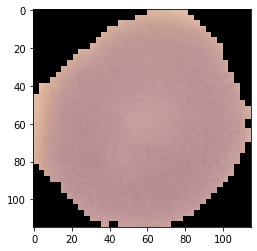

In [2]:
plt.imshow(img)
plt.show()


def f(t):
    imgpil = Image.open(t)  
    return np.array(imgpil)

13779


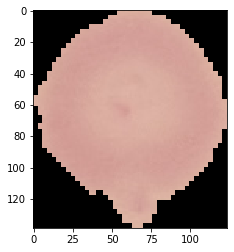

In [3]:
import glob
a=glob.glob('./cell_images/Uninfected/*.png')
#img = np.array(a)
print(len(a))
uninfected = [Image.open(t) for t in a[0:10]]
plt.imshow(uninfected[4])
plt.show()

In [4]:
import zipfile
from io import BytesIO

path_par = "cell_images/Parasitized.zip"
path_un = "cell_images/Uninfected.zip"

def extract_zip_to_memory(input_zip):
    '''
    This function extracts the images stored inside the given zip file.
    It stores the result in a python dictionary.
    
    input_zip (string): path to the zip file
    
    returns (dict): {filename (string): image_file (bytes)}
    '''
    input_zip=zipfile.ZipFile(input_zip)
    return {name: BytesIO(input_zip.read(name)) for name in input_zip.namelist() if name.endswith('.png')}

par_img_files = extract_zip_to_memory(path_par)
un_img_files = extract_zip_to_memory(path_un)

images_infected = np.array([np.asarray(Image.open(x)) for x in par_img_files.values()])
images_uninfected = np.array([np.asarray(Image.open(x)) for x in un_img_files.values()])

images_infected_gray = np.array([np.asarray(Image.open(x).convert('L')) for x in par_img_files.values()])
images_uninfected_gray = np.array([np.asarray(Image.open(x).convert('L')) for x in un_img_files.values()])

# list_images_infected = [images_infected[i].reshape(len(images_infected[i]*len(images_infected[i][0])),0)]


In [5]:
list_images_infected = [images_infected[i].reshape(len(images_infected[i])*len(images_infected[i][0]),3) for i in range(len(images_infected))]
list_images_uninfected = [images_uninfected[i].reshape(len(images_uninfected[i])*len(images_uninfected[i][0]),3) for i in range(len(images_uninfected))]

In [6]:
cleaned_list_images_infected = []
for i in range(500):
    cleaned_list_images_infected.append([x for x in list_images_infected[i] if list(x) != [0,0,0]])

In [7]:
cleaned_list_images_uninfected = []
for i in range(500):
    cleaned_list_images_uninfected.append([x for x in list_images_uninfected[i] if list(x) != [0,0,0]])

In [8]:
var_r = np.array([np.array(cleaned_list_images_infected[i][:][1]).var() for i in range(len(cleaned_list_images_infected))])
var_nonInfect = np.array([np.array(cleaned_list_images_uninfected[i][:][1]).var() for i in range(len(cleaned_list_images_uninfected))])

In [9]:
print(var_r.mean())
print(var_nonInfect.mean())
print(np.median(var_r))
print(np.median(var_nonInfect))

698.4657777777777
678.1902222222222
703.7777777777777
673.5555555555555


In [10]:
var_both = np.concatenate((var_r,var_nonInfect))

In [11]:
max_r = np.array([np.array(cleaned_list_images_infected[i][:][1]).max() for i in range(len(cleaned_list_images_infected))])
max_nonInfect = np.array([np.array(cleaned_list_images_uninfected[i][:][1]).max() for i in range(len(cleaned_list_images_uninfected))])

In [12]:
print(max_r.mean())
print(max_nonInfect.mean())
print(np.median(max_r))
print(np.median(max_nonInfect))

217.81
218.278
219.0
219.0


In [13]:
max_both = np.concatenate((max_r,max_nonInfect))

In [14]:
list_images_infected_gray = [images_infected_gray[i].reshape(len(images_infected_gray[i])*len(images_infected_gray[i][0])) for i in range(len(images_infected_gray))]
list_images_uninfected_gray = [images_uninfected_gray[i].reshape(len(images_uninfected_gray[i])*len(images_uninfected_gray[i][0])) for i in range(len(images_uninfected_gray))]

In [15]:
cleaned_list_images_infected_gray = []  #list to stock the infected cells images without the black pixels
for i in range(500):
    cleaned_list_images_infected_gray.append([x for x in list_images_infected_gray[i] if x != 0])

In [16]:
cleaned_list_images_uninfected_gray = []  #list to stock the uninfected cells images without the black pixels
for i in range(500):
    cleaned_list_images_uninfected_gray.append([x for x in list_images_uninfected_gray[i] if x != 0])

In [17]:
max_r_gray = np.array([np.array(cleaned_list_images_infected_gray[i]).max() for i in range(len(cleaned_list_images_infected_gray))])
max_nonInfect_gray = np.array([np.array(cleaned_list_images_uninfected_gray[i]).max() for i in range(len(cleaned_list_images_uninfected_gray))])

In [18]:
print(max_r_gray.mean())
print(max_nonInfect_gray.mean())
print(np.median(max_r_gray))
print(np.median(max_nonInfect_gray))

193.072
192.32
193.0
192.0


In [19]:
max_both_gray = np.concatenate((max_r_gray,max_nonInfect_gray))

In [20]:
var_r_gray = np.array([np.array(cleaned_list_images_infected_gray[i]).var() for i in range(len(cleaned_list_images_infected_gray))])
var_nonInfect_gray = np.array([np.array(cleaned_list_images_uninfected_gray[i]).var() for i in range(len(cleaned_list_images_uninfected_gray))])

In [21]:
print(var_r_gray.mean())
print(var_nonInfect_gray.mean())
print(np.median(var_r_gray))
print(np.median(var_nonInfect_gray))

176.12639464471263
63.733023308064034
142.592316319635
24.28285404880991


In [22]:
var_both_gray = np.concatenate((var_r_gray,var_nonInfect_gray))

In [23]:
res = np.vstack((max_both,var_both,max_both_gray,var_both_gray)).T

In [31]:
np.savetxt("varAndMaxNoBlack.csv", var_both, delimiter=",", fmt='%.2e') 